# LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.datasets import cifar10
from keras.models import Sequential # build the model from the left-end side to the right
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
C:\Users\et02950\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\et02950\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\et02950\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("X_train shape is :", X_train.shape)
print("X_test shape is :", X_test.shape)
print("y_train shape is :", y_train.shape)
print("y_test shape is :", y_train.shape)

X_train shape is : (50000, 32, 32, 3)
X_test shape is : (10000, 32, 32, 3)
y_train shape is : (50000, 1)
y_test shape is : (50000, 1)


# VIZ

C:\Users\tripl\Anaconda3\envs\dl\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


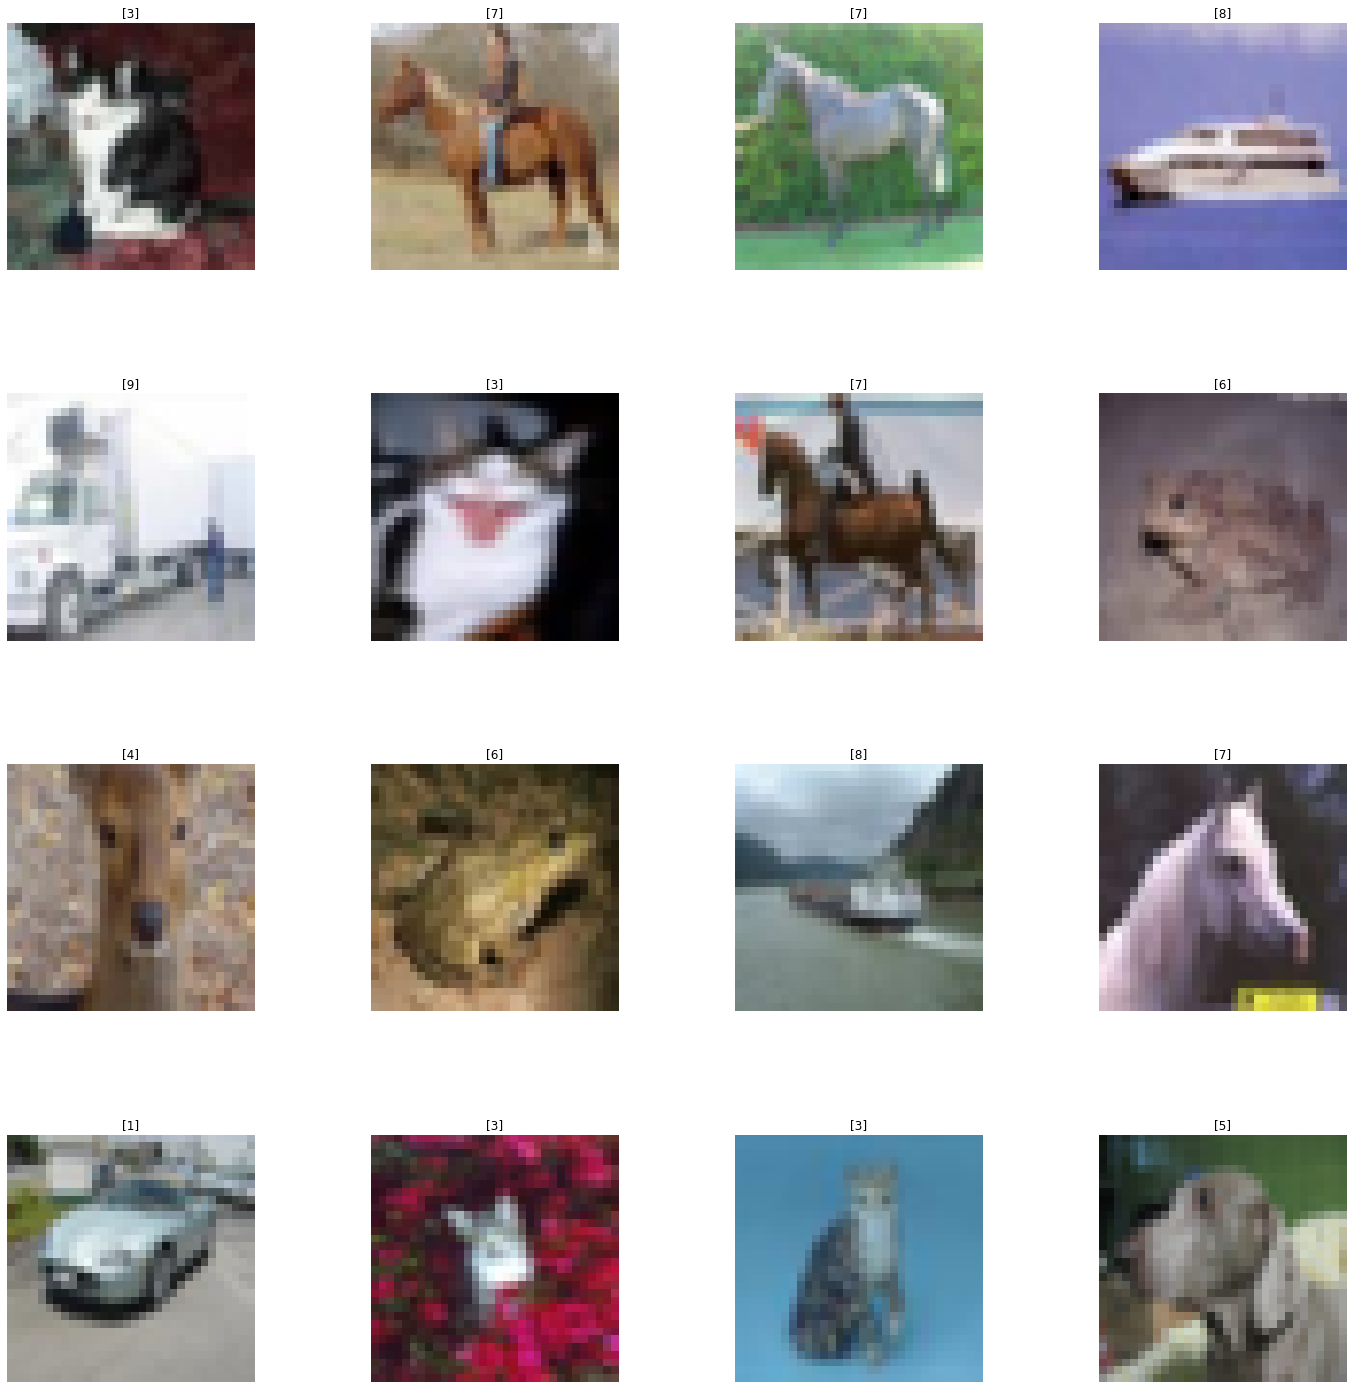

In [4]:
w_grid=4
l_grid = 4
fig, axes = plt.subplots(l_grid, w_grid, figsize= (25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace= 0.5)

# DATA PREPARATION

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
n_categories = 10
y_train = keras.utils.to_categorical(y_train, n_categories) # convert the numeric values to categories
y_test= keras.utils.to_categorical( y_test, n_categories)

In [6]:
#Normalization
X_train= X_train/255
X_test= X_test/255
input_shape = (32,32,3) #shape of X_train

# MODEL

In [7]:
#Architecture
classif= Sequential()
classif.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', input_shape= input_shape))
classif.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu'))
classif.add(MaxPooling2D(2,2))
classif.add(Dropout(0.5))
classif.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
classif.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
classif.add(MaxPooling2D(2,2))
classif.add(Dropout(0.2))
classif.add(Flatten())
classif.add(Dense(units= 512, activation= 'relu'))
classif.add(Dense(units= 512, activation= 'relu'))
classif.add(Dense(units= 10, activation= 'softmax'))

In [8]:
classif.compile(loss= "categorical_crossentropy", optimizer= keras.optimizers.rmsprop(lr= 0.001), metrics= ['accuracy'])
epoch_history= classif.fit(X_train, y_train, batch_size= 32, epochs=5, shuffle= True)

Epoch 1/5
50000/50000 [==============================] - 178s 4ms/step - loss: 1.6184 - accuracy: 0.4122
Epoch 2/5
50000/50000 [==============================] - 171s 3ms/step - loss: 1.2171 - accuracy: 0.5717
Epoch 3/5
50000/50000 [==============================] - 175s 3ms/step - loss: 1.0909 - accuracy: 0.6212
Epoch 4/5
50000/50000 [==============================] - 170s 3ms/step - loss: 1.0475 - accuracy: 0.6428
Epoch 5/5
50000/50000 [==============================] - 7775s 156ms/step - loss: 1.0159 - accuracy: 0.6517


# EVALUATION

In [9]:
evaluation= classif.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 5s 525us/step
Test Accuracy: 0.6643000245094299


In [11]:
pred_class= classif.predict_classes(X_test)
pred_class

array([3, 1, 1, ..., 5, 4, 7], dtype=int64)

In [15]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

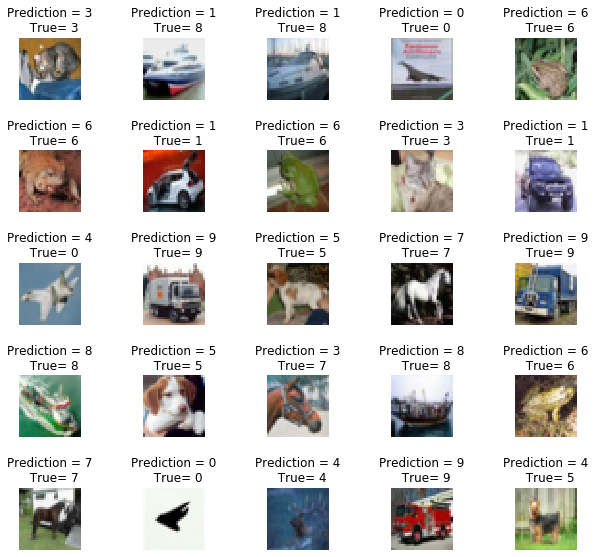

In [17]:
#VIZ OF THE PREDICTIONS
L= 5
W= 5 
fig, axes = plt.subplots(L, W, figsize= (10,10))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n  True= {}'. format(pred_class[i], y_test[i]))
    axes[i].axis('off')

    
plt.subplots_adjust(wspace=1)



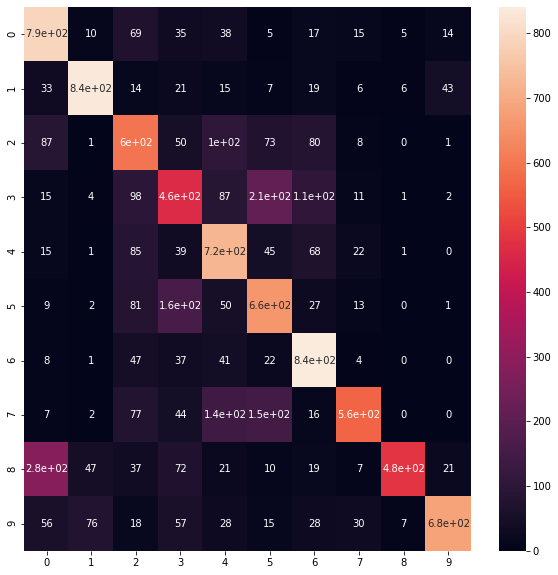

In [18]:
#CONFUSION MATRIX
cm= confusion_matrix(y_test, pred_class)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

# MODEL SAVING

In [19]:
classif.save('cifar_model1_65.h5')

# IMAGE AUGMENTATION

In [4]:
from keras.models import load_model
classif= load_model('cifar_model1_65.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
classif.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [14]:
#DATA PREP
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
n_categories = 10
y_train = keras.utils.to_categorical(y_train, n_categories) # convert the numeric values to categories
y_test= keras.utils.to_categorical( y_test, n_categories)
X_train= X_train/255
X_test= X_test/255

In [15]:
#create rotated images
aug_data= ImageDataGenerator(rotation_range= 95,
                             width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )
aug_data.fit(X_train)

In [16]:
classif.fit_generator(aug_data.flow(X_train, y_train, batch_size=32), epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.7268 - accuracy: 0.3781
Epoch 2/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6305 - accuracy: 0.4128
Epoch 3/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5958 - accuracy: 0.4297
Epoch 4/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5654 - accuracy: 0.4429
Epoch 5/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.5470 - accuracy: 0.4513


In [17]:
#EVALUATION
aug_eval= classif.evaluate(X_test,y_test)
print("Test accuracy", aug_eval[1])

10000/10000 [==============================] - 6s 637us/step
Test accuracy 0.4465999901294708


In [18]:
#SAVING
classif.save("cifar_aug_model_44.h5")